## 부스팅(Boosting)

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

In [2]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# Tree Algorithm 은 Min-Max Scaling이 필수적이지 않음
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target,
    test_size=0.2, random_state=2022
)

### 1. XGBoost (eXtra Gradient Boost)
- PC에서 설치
<pre>
conda activate base
conda install -c anaconda py-xgboost
</pre>

In [8]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2022)
print(xgb.get_params())
# n_jobs = -1 : 병렬처리
# objective : 이진분류, 다중분류 등

{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'enable_categorical': False, 'gamma': None, 'gpu_id': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 2022, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

[11:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9722222222222222

- Visualization

In [31]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt

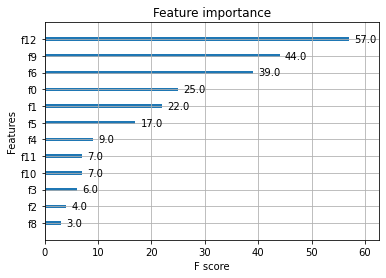

In [32]:
xgb_plot_importance(xgb)
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,4,5,6]}
gv_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=5)
gv_xgb.fit(X_train, y_train)
gv_xgb.best_params_

[11:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

{'max_depth': 3}

In [19]:
gv_xgb.best_estimator_.score(X_test, y_test)

1.0

## 2.Light GBM

- PC에 설치
<pre>
conda activate base
conda install -c conda-forge lightgbm
</pre>

In [20]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [23]:
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	valid_0's multi_logloss: 0.958896
[2]	valid_0's multi_logloss: 0.85598
[3]	valid_0's multi_logloss: 0.759126
[4]	valid_0's multi_logloss: 0.681757
[5]	valid_0's multi_logloss: 0.611392
[6]	valid_0's multi_logloss: 0.546183
[7]	valid_0's multi_logloss: 0.499552
[8]	valid_0's multi_logloss: 0.452633
[9]	valid_0's multi_logloss: 0.414823
[10]	valid_0's multi_logloss: 0.377414
[11]	valid_0's multi_logloss: 0.345953
[12]	valid_0's multi_logloss: 0.313267
[13]	valid_0's multi_logloss: 0.288691
[14]	valid_0's multi_logloss: 0.268689
[15]	valid_0's multi_logloss: 0.248957
[16]	valid_0's multi_logloss: 0.230522
[17]	valid_0's multi_logloss: 0.20812
[18]	valid_0's multi_logloss: 0.192483
[19]	valid_0's multi_logloss: 0.181496
[20]	valid_0's multi_logloss: 0.170151
[21]	valid_0's multi_logloss: 0.158769
[22]	valid_0's multi_logloss: 0.149514
[23]	valid_0's multi_logloss: 0.138882
[24]	valid_0's multi_logloss: 0.132525
[25]	valid_0's multi_logloss: 0.123253
[26]	valid_0's multi_logloss: 0.1173

LGBMClassifier()

In [24]:
pred_lgb = lgb.predict(X_test)
accuracy_score(y_test, pred_lgb)

1.0

- Visualization

In [25]:
from lightgbm import plot_metric, plot_importance, plot_tree

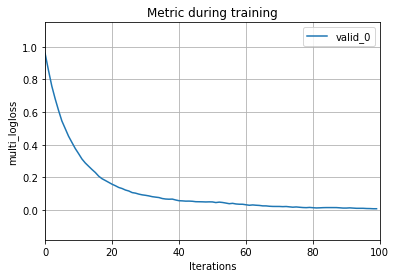

In [26]:
plot_metric(lgb);

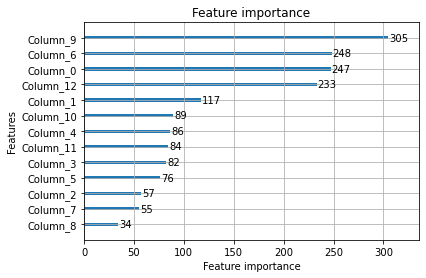

In [27]:
plot_importance(lgb);

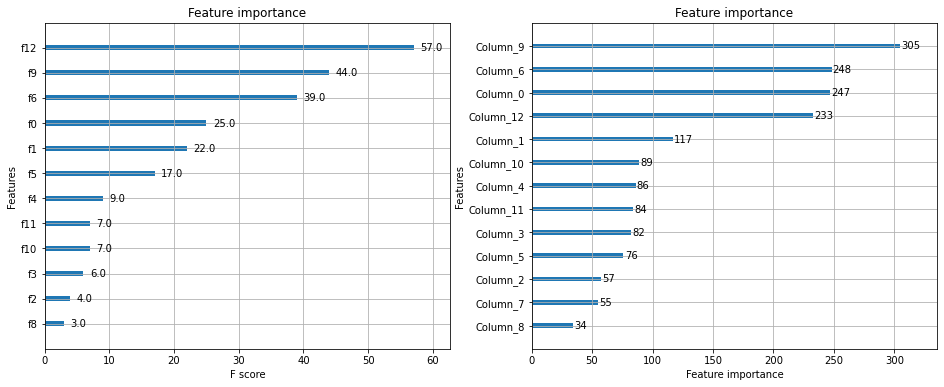

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
xgb_plot_importance(xgb, ax=ax[0])
plot_importance(lgb, ax=ax[1])
plt.show()

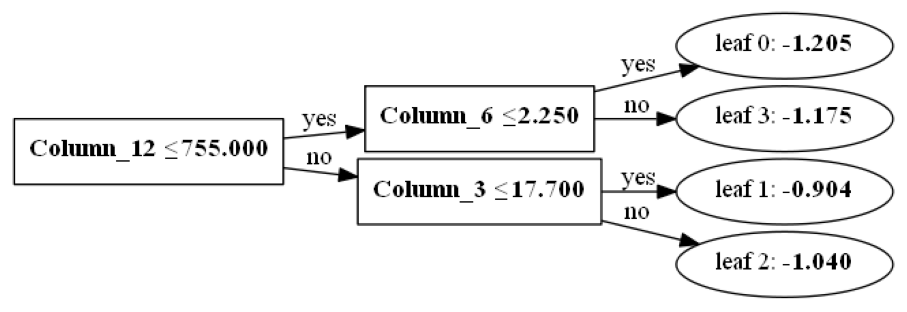

In [35]:
plot_tree(lgb, figsize=(16, 12));